In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
my_tau = np.load('/Users/jsmonzon/lbg_da/tau_data/tau.npy')

In [22]:
def kirkman_correction(tau, red, plot=False):

    """

    :param tau: (numpy array) the tau_eff values from both bins
    :param red: (numpy array) the redshift values from both bins

    :return:
        (numpy array) the corrected tau values
    """
    import numpy as np
    import matplotlib.pyplot as plt

    lam = 1216 * ((1 + red) / (1 + np.median(red))) # using the pivot to return to angstroms

    tau_m = np.log(1 + (0.01564 - (4.646 * 10**(-5) * (lam - 1360))))

    print("the average percentage contributed by metals:", 100 * np.average(tau_m/tau))
    
    if plot==True:
        
        plt.scatter(red, tau, label="original")
        plt.scatter(red, tau-tau_m, label="corrected")
        plt.legend()
        plt.show()

    return tau-tau_m

In [23]:
def schaye_correction(tau, red, plot=False):

    """

    :param tau: (numpy array) the tau_eff values from both bins
    :param red: (numpy array) the redshift values from both bins

    :return:
        (numpy array) the corrected tau values
    """
    import numpy as np
    import matplotlib.pyplot as plt

    #(log τ0 , α) = (−0.40 ± 0.02, 3.40 ± 0.23) metals
    #(log τ0 , α) = (−0.44 ± 0.01, 3.57 ± 0.20) no metals
    
    tau_m = (np.exp(-0.44)/np.exp(-0.40)) * ((1+red)/4)**(3.57-3.40) * tau

    print("the average percentage contributed by metals:", 100 * np.average(tau_m/tau))
    
    if plot==True:
        
        plt.scatter(red, tau, label="original")
        plt.scatter(red, tau_m, label="corrected")
        plt.legend()
        plt.show()

    return tau_m

the average percentage contributed by metals: 17.6551539245373


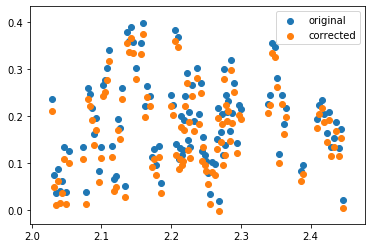

In [24]:
tau_cor = kirkman_correction(my_tau[1], my_tau[0], plot=True)

the average percentage contributed by metals: 92.61607996957329


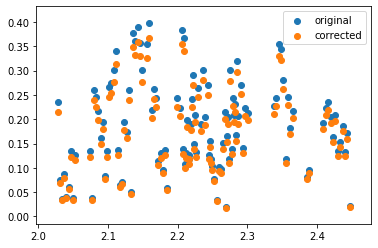

In [25]:
tau_cor = schaye_correction(my_tau[1], my_tau[0], plot=True)

In [9]:
def becker13(z):
    
    return 0.751*((1+z)/(1+3.5))**2.90 -0.132

In [10]:
becker13(2.22)

0.15251533219205826

In [11]:
def kirkman05(z):

    return np.log(1 + (.0062*(1+z)**2.75))

In [12]:
kirkman05(2.22)

0.1436879513410258

In [8]:
def schaye03(z):
    
    return np.exp((-0.44) + (3.57*np.log((1+z)/4)))

In [16]:
schaye03(2.22)

0.29689420505263925

In [2]:
z_range = np.linspace(2,5,100)

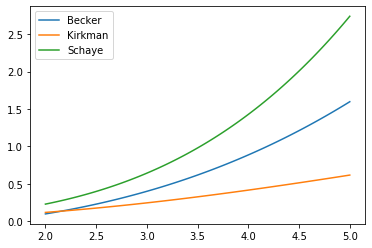

In [15]:
plt.plot(z_range, becker13(z_range), label="Becker")
plt.plot(z_range, kirkman05(z_range), label="Kirkman")
plt.plot(z_range, schaye03(z_range), label="Schaye")
plt.legend()
plt.show()